# Part 1: Import necessary python modules (libraries)
***

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib & seaborn — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.
 - Pickle for saving model

In [0]:
# Import the neccessary modules for data manipulation and visual representation
# Pandas for DataFrames
import pandas as pd

# NumPy for numerical computing
import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib as matplot

# Seaborn for easier visualization
import seaborn as sns

import warnings
import pickle

# Scikit-Learn's
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score, accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")
%matplotlib inline

## Part 1b: Basic Python Operations

For a concise and meaningful introduction to Python, we recommend the [Whirlwhind Tour of Python](https://github.com/jakevdp/WhirlwindTourOfPython) -- a free online book published by O'Reilly Media.  As an extended overview of how to do Data Science in Python, we recommend the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) -- also a free online book published by O'Reilly Media.  Both of these books have been used by a wide variety of beginners to experts, with high acclaim.

Here, we will review the basic syntax of Python for people with some programming experience.

---
Gain Information on the Fly

Note that 'everything' in Python is actually an object. To understand it's unlying usage, users can either print `dir(...)` or [in an iPython environment] use the `?` key to symbolize `help(...)`; i.e.

`np.array?`

or

`dir(np.array)`

These perform two different facets; but they are both very helpful in learning a new data type, class, or function.

### Single Value Data Types

In [2]:
# Integers
print(int(3.8))

# Floats
print(float(3.8))

# Strings
print(str(3.8))

3
3.8
3.8


### Lists
Mutable collection of objects -- i.e. elements and structure can be changed

In [3]:
import numpy as np
thing1 = [1, 'one', np.ones(1)]
print(thing1)

thing1.append(2)  # add a single item to the list
print(thing1)

thing1.extend(['two', 2*np.ones(1)]) # add a set of items to the list
print(thing1)


# Concatenate item(s) to the list
thing1 = [1, 'one', np.ones(1)]
thing2 = [2, 'two', 2*np.ones(1)]
print(thing1 + thing2)

# Lists can be generated by multiplying an integrer by another list
repeated_list1 = [1]*3
repeated_list2 = thing1*2
print(repeated_list1)
print(repeated_list2)

# Lists can be generated using internal for loops (see below), which is 
#   called "list comprehension"
comprehended_list = [k*k for k in range(10)]  # squares of integers

[1, 'one', array([1.])]
[1, 'one', array([1.]), 2]
[1, 'one', array([1.]), 2, 'two', array([2.])]
[1, 'one', array([1.]), 2, 'two', array([2.])]
[1, 1, 1]
[1, 'one', array([1.]), 1, 'one', array([1.])]


In [4]:
comprehended_list

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### Tuples
An immutable collection of objects -- i.e. elements and structure canNOT be changed


In [5]:
import numpy as np
thing1 = (1, 'one', np.ones(1))
print(thing1)

# Concatenate item(s) to the tuple
thing1 = (1, 'one', np.ones(1))
thing2 = (2, 'two', 2*np.ones(1))
print(thing1 + thing2)

# Tuples can be generated by multiplying an integrer by another tuple; 
#   but only implicitly; i.e. option 2 below
not_repeated_tuple = (1)*3  #  == (3)
repeated_tuple = thing1*2
print(not_repeated_tuple)
print(repeated_tuple)

# Tuples can be generated using internal for loops (see below), which is 
#   called "tuple comprehension"; but this generates a "generator"
comprehended_tuple = (k*k for k in range(10))  # squares of integers

print(comprehended_tuple)  # prints the genrator __repr__ call

# extracts the integer value of each square
for k in comprehended_tuple:
  print(k)

(1, 'one', array([1.]))
(1, 'one', array([1.]), 2, 'two', array([2.]))
3
(1, 'one', array([1.]), 1, 'one', array([1.]))
<generator object <genexpr> at 0x7f61aa9be258>
0
1
4
9
16
25
36
49
64
81


### Sets
Mutable collection of values from a single object type. Only one representation of each value can be included; i.e. all values are unique + sorted.

Sets also contain unique methods that follow Real Algebraic rules (i.e. set theory)

In [6]:
import numpy as np
thing1 = [1,1,2,3,5,8]  # Fibonacci Sequence
thing2 = set(thing1)
print(thing1)  # Exactly as before with lists
print(thing2)  # Only one of the 1 values remains


thing2.add(2)  # add a single item to the list
print(thing2)  # Same as before, because 2 already existed in `thing2`

thing2.add(13) 
print(thing2)  # Now a new value has been added to the set


# Capture the intersection of 2 sets
thing1 = set(thing1)
print(thing1.intersection(thing2))


# Capture the union of 2 sets
print(thing1.union(thing2))

# Test if all values of thing1 are in thing2
thing1.issubset(thing2)  # True

[1, 1, 2, 3, 5, 8]
{1, 2, 3, 5, 8}
{1, 2, 3, 5, 8}
{1, 2, 3, 5, 8, 13}
{1, 2, 3, 5, 8}
{1, 2, 3, 5, 8, 13}


True

### Dictionaries
Mutable collection of objects -- i.e. elements and structure can be changed. 

Unlike lists (and later arrays), these objects can be indexed with (almst) arbitrary datatypes; i.e. 'not only integers'.

In [7]:
import six

# Datatypes are preserved internally
thing1 = {'one':1, 2.0:2, 3:np.ones(3)}  

# Even module, function, methods handles can be contained sanely
thing2 = {4:'four', 'five':5, 'six':six}

# Access is given by the 'key' on the left to the 'value' on the right
print('Thing1')
print(thing1['one'])
print(thing1[2.0])
print(thing1[3])

print('Thing2')
print(thing2[4])
print(thing2['five'])
print(thing2['six'])


# Combine two dictionaries: be careful that no 2 keys are the same
print(thing1)
print(thing2)
for key, val in thing2.items():
  thing1[key] = val

print(thing1)


# Dictionaries can be created within internal for loops
#   This is called 'dictionary comprehension
thing1 = {key:int(key) for key in ['1', '2', '3']}

Thing1
1
2
[1. 1. 1.]
Thing2
four
5
<module 'six' from '/usr/local/lib/python3.6/dist-packages/six.py'>
{'one': 1, 2.0: 2, 3: array([1., 1., 1.])}
{4: 'four', 'five': 5, 'six': <module 'six' from '/usr/local/lib/python3.6/dist-packages/six.py'>}
{'one': 1, 2.0: 2, 3: array([1., 1., 1.]), 4: 'four', 'five': 5, 'six': <module 'six' from '/usr/local/lib/python3.6/dist-packages/six.py'>}


### Arrays
Numpy is a numerical Python package that provides extensive object cohesion for mathematical operations

In [8]:
import numpy as np
thing1 = [k*k for k in range(10)]
print(thing1)

thing1 = np.array(thing1)
print(thing1)

# Numpy arrays have many hundreds of mathematical operators and data manipulation
#   methods. Some for data storage and others for information extraction

print(thing1.size)
print(thing1.shape)
print(thing1.mean())
print(thing1.std())

# Numpy arrays behave similar to lists; but require a single data type
thing2 = np.array([1, 'one', 2.0])  # This works; but does not provide mathematical operation

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[ 0  1  4  9 16 25 36 49 64 81]
10
(10,)
28.5
26.852374196707448


### DataFrames
Pandas is a Python package for Data Analysis.  It provides very similar behaviour to both a numpy array and a dictionary. These overarching behavior of a Pandas DataFrame in similar in context to an SQL database

These will be addressed in detail below.

In [9]:
import pandas as pd
thing1 = {key:[int(key)]*5 for key in ['1', '2', '3']}
thing2 = pd.DataFrame(thing1)

# Jupyter environments and similar notebooks provide greater context for DataFrames
thing2

,1,2,3
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3


### While and for loops
Built in operators that cycle through sequences of data

In [10]:
for k in range(10):
  print(k*k)

0
1
4
9
16
25
36
49
64
81


In [11]:
k = 0
while k < 10:
  print(k*k)
  k = k+1

0
1
4
9
16
25
36
49
64
81


### Functions
User designed operations that perform segments of scripts

In [12]:
def square(number):
  return number**2

thing1 = [square(k) for k in range(10)]
print(thing1)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


# Part 2: Scrubbing the Data 
***
Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function and saved in variable df

In [13]:
!git clone https://github.com/BeirutAI/ML_in_SQL
  
df = pd.read_csv('/content/ML_in_SQL/Notebook/HR_comma_sep.csv')

Cloning into 'ML_in_SQL'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 495 (delta 37), reused 77 (delta 24), pack-reused 390
Receiving objects: 100% (495/495), 12.07 MiB | 41.32 MiB/s, done.
Resolving deltas: 100% (196/196), done.


Using the 'head' method prints the top 5 DataFrame rows; the keyword 'n=5' can be set to print more or less than 5 lines

In [14]:
df.head(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Print last 5 rows

In [15]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


Let's dig deeper & understand out data by checking its shape

In [16]:
df.shape

(14999, 10)

In [17]:
# Check type of the shape
type(df.shape)

tuple

In [18]:
n_rows = df.shape[0]
n_columns = df.shape[1]
print('There are {} rows and {} columns.'.format(n_rows,n_columns))

There are 14999 rows and 10 columns.


using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Display the number of missing observations for each feature.

In [20]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Display columns of the data frame

In [21]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Renaming certain columns for better readability

In [0]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

Get unique values for a columns (sales & salary) in Pandas data frame

In [23]:
print(df['department'].unique())
print(df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


Move the reponse variable "turnover" to the front of the table by dropping the lables and insert it on index 0

In [24]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3: Exploring the Data

##  3a. Statistical Overview 
using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each feature (column)

In [25]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [26]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
# turnover_rate = df.turnover.value_counts() / 14999
turnover_rate = df.groupby('turnover').size()/14999
turnover_rate

turnover
0    0.761917
1    0.238083
dtype: float64

In [0]:
# df.groupby(['department','turnover']).size()/14999

The dataset has:
 - About 15,000 employee observations and 10 features 
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.66

Overview of summary (Turnover V.S. Non-turnover) using group by 'turnover' and check its mean

In [28]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 3b. Data Visualization

Let's show the counts of observations in each categorical bin using bars

Show value counts for a the categorical variables grouped by Nb of employee

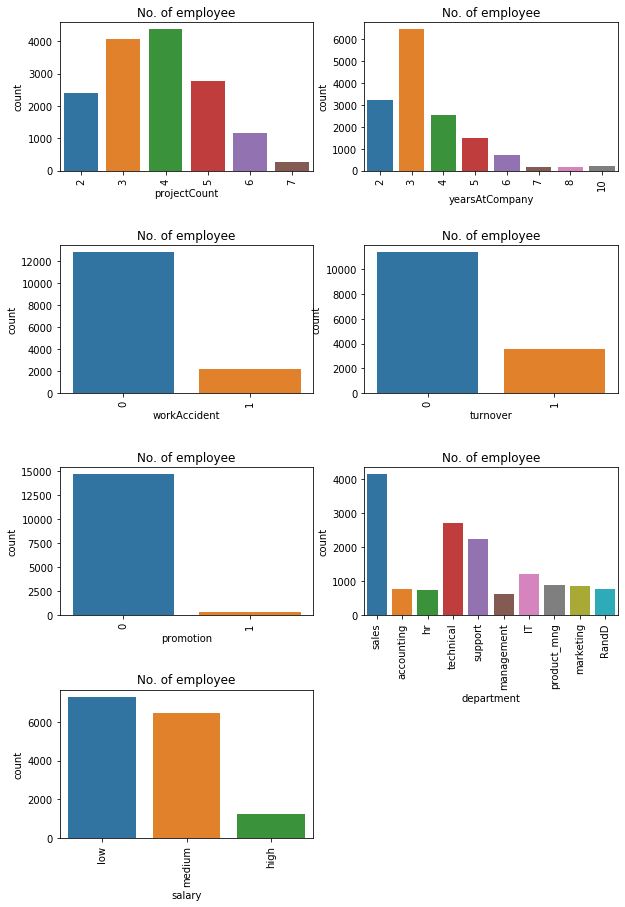

In [29]:
# Define features to visualize
features=['projectCount',
          'yearsAtCompany',
          'workAccident',
          'turnover', 
          'promotion',
          'department',
          'salary']

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [30]:
type(features)

list

Show value counts for two categorical variables grouped by 'Nb of employee'.

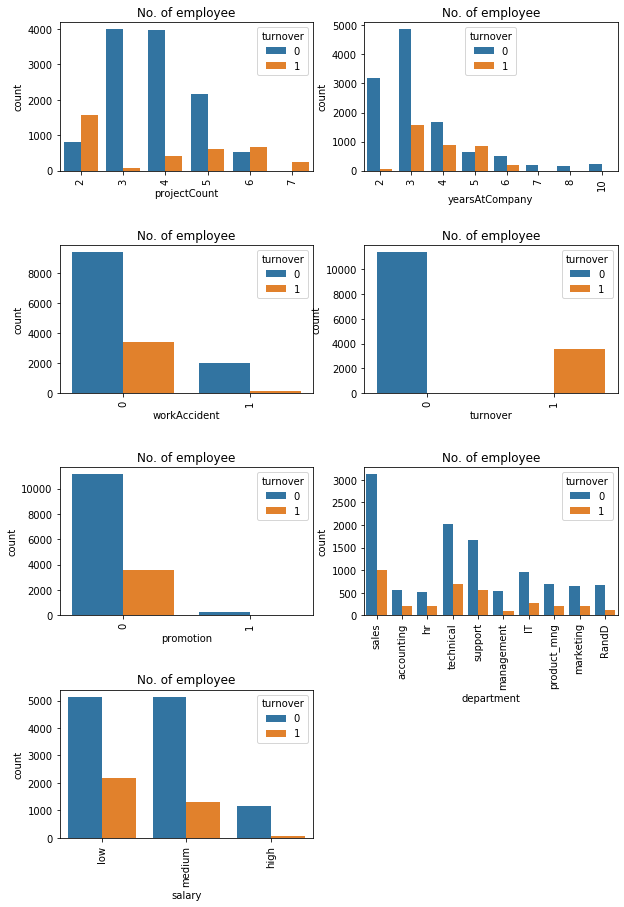

In [31]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df, 
                  hue='turnover'
                 )
    plt.xticks(rotation=90)
    plt.title("No. of employee")

##  3c. Correlation Matrix & Heatmap

Find the correlation among the columns and display it

In [32]:
corr = df.corr()
# corr = (corr)
corr

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


Let's plot a heat meat of the correlation column, we can specify the mask property to hide the symmetric part of it

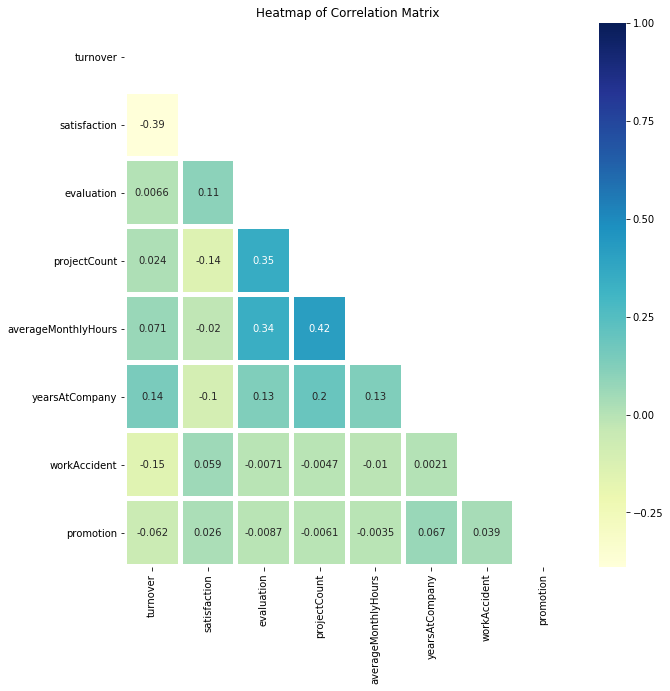

In [33]:
plt.figure(figsize=(10,10))

mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr,
            annot=True,
            mask=mask,
            cmap="YlGnBu",
            linewidths=4.0).set_title('Heatmap of Correlation Matrix')
plt.show()

In [34]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

## 3d. K-Means Clustering of Employee Turnover

Let's check the clusters for employees who left the company by grouping on 'satisfaction' and 'evaluation', we define K as number of clusters 3

In [0]:
k =3

left_emp =  df[['satisfaction', 'evaluation']][df.turnover == 1]
kmeans = KMeans(n_clusters = k, 
                random_state = 0).fit(left_emp)

Let's plot a scatter plot to visualization the clusters

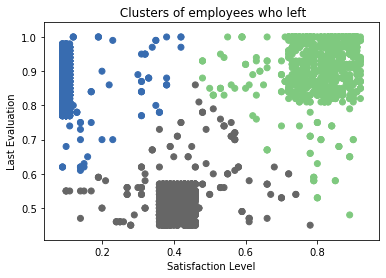

In [36]:
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction'], 
            left_emp['evaluation'], 
            c=left_emp['label'],
            cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title(' Clusters of employees who left')
plt.show()

**There are three categories of employees<br>**
*High satisfaction and high performance<br>*
*Low satisfaction and high performance<br>*
*Low satisfation and low performance<br>*

# 4. Modeling the Data
***

**Precision and Recall / Class Imbalance**

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down. 

In this case, evaluating our model’s algorithm based on **accuracy** is the **wrong** thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: **False Positive** and **False Negative** errors. 

**False Positives (Type I Error)**: You predict that the employee will leave, but do not

**False Negatives (Type II Error)**: You predict that the employee will not leave, but does leave

In this problem, what type of errors do we care about more? False Positives or False Negatives?


## 4a. Dummy encoding

Create dummy variables for the 'department' and 'salary' features, since they are categorical.

Set drop first column to true to avoid dummy trap

In [0]:
department = pd.get_dummies(data=df['department'],
                            drop_first=True,
                            prefix='dep')

salary = pd.get_dummies(data=df['salary'],
                        drop_first=True,
                        prefix='sal')

Display dummy variables

In [38]:
department.head()

,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


Drop main column and append dummy column to the original dataframe

In [39]:
df.drop(['department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,sal_low,sal_medium
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


## 4b. Scaling the data

Divide the feature data from the class data into two variables x & y

In [0]:
y= df.turnover
X = df.drop('turnover',axis=1) 

Initialize instance of RobustScaler and called robust_scaler
to fit and apply a transformation in one line of code, you can use the .fit_transform() function.

In [0]:
# Scale, Standardize, or Normalize with Scikit-Learn
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

## 4c. Splitting to training and test data set

Split data into training (80%) & testing (20%) and set random state 123

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, 
                                                    random_state=123, 
                                                    stratify=y)

## 4d. Check model performance out of the four

- Logistic Regression Model
- Decision Tree Model
- AdaBoost Model
- Random Forest Model

### Base Model

Define functions

In [0]:
def print_metrics(model_name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # print("Accuracy Score",acc)
    # print("Precision Score",precision)
    # print("Recall Score", rec)
    # print("F1 Score",f1)
    df = pd.DataFrame([[model_name,acc,precision,rec,f1]],
                             columns=['Model','Accuracy','Precision',
                                      'Recall','F1 Score'])
    return df

Create base rate model

In [0]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

Check accuracy of base rate model

In [0]:
y_pred = base_rate_model(X_test)
result_metrics = print_metrics('Base Rate',y_test,y_pred)

### Logistic Regression Model

In [46]:
# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Check accuracy of LogisticRegression

In [47]:
y_pred=logis.predict(X_test)
rf = print_metrics('Logistic Regression',y_test,y_pred)

result_metrics= result_metrics.append(rf,ignore_index = True)
result_metrics.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Base Rate,0.762,0.00000,0.000000,0.000000
1,Logistic Regression,0.765,0.50393,0.808123,0.620764


### Decision Tree Model

In [0]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    random_state=0,
    class_weight="balanced"
    )
dtree = dtree.fit(X_train,y_train)

In [49]:
y_pred=dtree.predict(X_test)

df_metrics = print_metrics('Decision Tree',y_test,y_pred)

result_metrics= result_metrics.append(df_metrics,ignore_index = True)
result_metrics.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Base Rate,0.762000,0.000000,0.000000,0.000000
1,Logistic Regression,0.765000,0.503930,0.808123,0.620764
2,Decision Tree,0.983333,0.949864,0.981793,0.965565


### Random Forest Model

In [50]:
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [51]:
y_pred=rf.predict(X_test)
df_metrics = print_metrics('Random Forest',y_test,y_pred)

result_metrics= result_metrics.append(df_metrics,ignore_index = True)
result_metrics.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Base Rate,0.762000,0.000000,0.000000,0.000000
1,Logistic Regression,0.765000,0.503930,0.808123,0.620764
2,Decision Tree,0.983333,0.949864,0.981793,0.965565
3,Random Forest,0.987000,0.989840,0.955182,0.972202


### Ada Boost Model

In [52]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=400, random_state=None)

In [53]:
y_pred=ada.predict(X_test)
df_metrics = print_metrics('Ada Boost',y_test,logis.predict(X_test))

result_metrics= result_metrics.append(df_metrics,ignore_index = True)
result_metrics.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Base Rate,0.762000,0.000000,0.000000,0.000000
1,Logistic Regression,0.765000,0.503930,0.808123,0.620764
2,Decision Tree,0.983333,0.949864,0.981793,0.965565
3,Random Forest,0.987000,0.989840,0.955182,0.972202
4,Ada Boost,0.765000,0.503930,0.808123,0.620764


# 5. Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

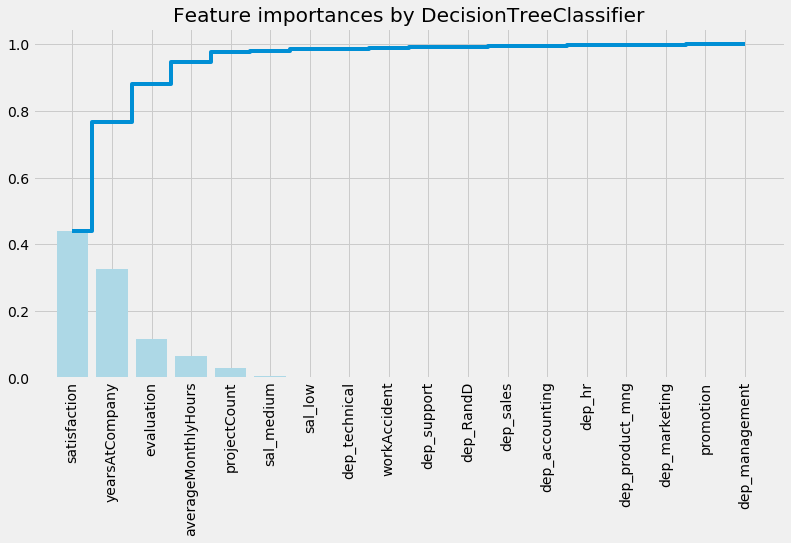

In [54]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# 6. Visualizing the Decision Tree Model


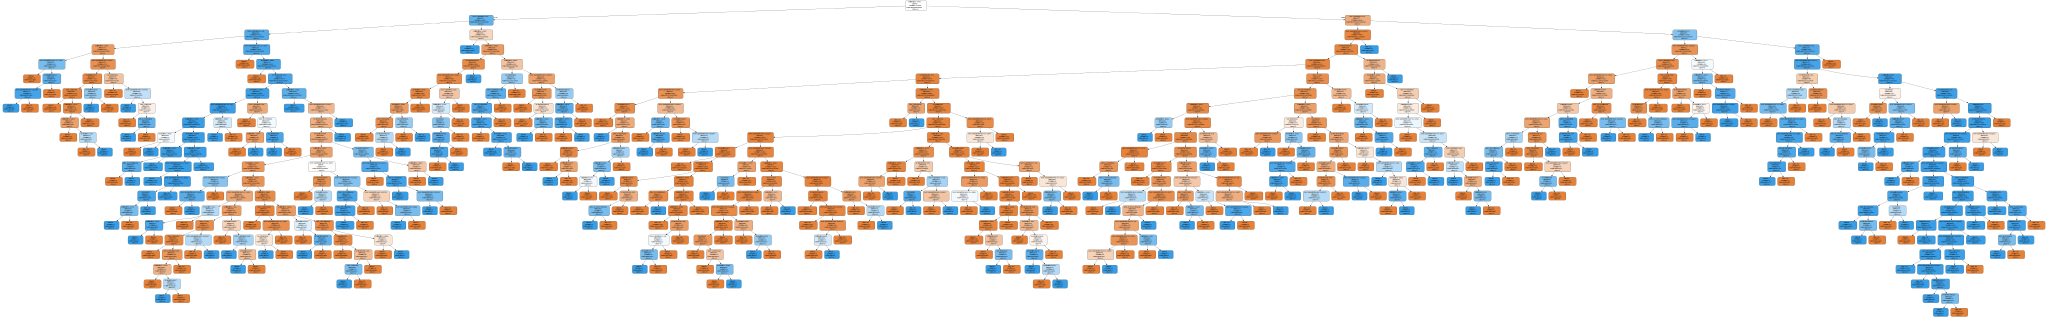

In [55]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Employee Turnover") 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feat_names,  
                         class_names='turnover',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# 7. Save, Load and Test the model

Save the model to disk by calling pickel.dump

In [0]:
# save the model to disk
filename = 'best_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

Load the model from disk by calling pickel.load and check it's accuracy

In [57]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,  y_test )
print(result)

0.9833333333333333
